### Part 1

In [1]:
%%capture
import sys
if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap

In [2]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from pandas_profiling import ProfileReport
import plotly.express as px
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, cross_val_predict

### Part 2

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/John-G-Thomas/Projects/master/Project24revision.csv')
df.set_index(pd.to_datetime(df['Datetime']), inplace = True)
df = df.drop(columns='Datetime')
print(df.shape)
df.head()

(2970, 12)


,month,Year,Decade_SMA,Global_Warming,Yearly_SMA_Solid_Fuel,Yearly_SMA_Gas_Fuel,Yearly_SMA_Cement,Yearly_SMA_Gas_Flaring,Yearly_SMA_Per_Capita,Yearly_SMA_Liquid_Fuel,Yearly_SMA_CarbonTotal,Average_Temps
Datetime,,,,,,,,,,,,
1761-10-01,10,1761,8.057650,0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,7.227
1761-11-01,11,1761,8.074775,0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,5.089
1762-01-01,1,1762,8.106300,0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,6.866
1762-02-01,2,1762,8.099425,0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,4.801
1762-03-01,3,1762,8.058075,0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,3.528


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2970 entries, 1761-10-01 to 2010-12-01
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   month                   2970 non-null   int64  
 1   Year                    2970 non-null   int64  
 2   Decade_SMA              2970 non-null   float64
 3   Global_Warming          2970 non-null   int64  
 4   Yearly_SMA_Solid_Fuel   2970 non-null   float64
 5   Yearly_SMA_Gas_Fuel     2970 non-null   float64
 6   Yearly_SMA_Cement       2970 non-null   float64
 7   Yearly_SMA_Gas_Flaring  2970 non-null   float64
 8   Yearly_SMA_Per_Capita   2970 non-null   float64
 9   Yearly_SMA_Liquid_Fuel  2970 non-null   float64
 10  Yearly_SMA_CarbonTotal  2970 non-null   float64
 11  Average_Temps           2970 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 301.6 KB


In [5]:
df.describe()

,month,Year,Decade_SMA,Global_Warming,Yearly_SMA_Solid_Fuel,Yearly_SMA_Gas_Fuel,Yearly_SMA_Cement,Yearly_SMA_Gas_Flaring,Yearly_SMA_Per_Capita,Yearly_SMA_Liquid_Fuel,Yearly_SMA_CarbonTotal,Average_Temps
count,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000,2970.000000
mean,6.518182,1886.620539,8.339950,0.414141,701.358418,191.401684,35.053535,13.615993,0.257497,515.093939,1456.495286,8.370691
std,3.448389,71.651864,0.412514,0.492656,864.692458,398.277173,78.318491,26.648685,0.460562,942.592184,2258.948078,4.299048
min,1.000000,1761.000000,7.220025,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.131000
25%,4.000000,1825.000000,8.054294,0.000000,16.354167,0.000000,0.000000,0.000000,0.000000,0.000000,16.354167,4.357250
50%,7.000000,1887.000000,8.281392,0.000000,278.500000,2.000000,0.000000,0.000000,0.000000,5.000000,285.083333,8.618000
75%,10.000000,1949.000000,8.629850,1.000000,1061.208333,76.729167,14.291667,0.000000,0.000000,362.291667,1439.104167,12.465750
max,12.000000,2010.000000,9.544083,1.000000,3842.000000,1702.000000,450.000000,110.000000,1.330000,3122.000000,9167.000000,15.462000


In [6]:
#Value counts of all columns 
for col in df.columns:
    print(df[col].value_counts(normalize=True))

11    0.084175
10    0.084175
9     0.083838
3     0.083838
6     0.083838
4     0.083838
12    0.083502
2     0.083502
5     0.083165
8     0.083165
7     0.082155
1     0.080808
Name: month, dtype: float64
2009    0.004040
1928    0.004040
1952    0.004040
1950    0.004040
1948    0.004040
          ...   
1838    0.003704
1773    0.003704
1780    0.003367
1774    0.003030
1761    0.000673
Name: Year, Length: 250, dtype: float64
8.036792    0.000673
8.650258    0.000673
8.492667    0.000673
8.640400    0.000673
8.662267    0.000673
              ...   
8.219817    0.000337
8.565600    0.000337
8.421400    0.000337
8.394367    0.000337
8.273558    0.000337
Name: Decade_SMA, Length: 2960, dtype: float64
0    0.585859
1    0.414141
Name: Global_Warming, dtype: float64
3.000000       0.035354
5.000000       0.035354
4.000000       0.034007
6.000000       0.020539
10.000000      0.016835
                 ...   
1351.000000    0.000337
80.916667      0.000337
317.916667     0.000337
87.666

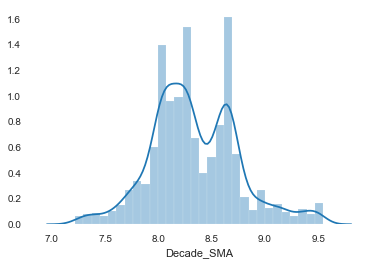

In [8]:
# Slightly Symetric 
%matplotlib inline
import seaborn as sns
sns.distplot(df['Decade_SMA']);

### Part 3 Baseline